In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../../../data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df = data

In [4]:
df = df.drop_duplicates()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.date = df["date"].map(lambda x: x.split("/")[0])
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
df['date'] = df['date'].map(lambda x: int(x))

In [7]:
df['bed_bath'] = df['bedrooms']/df['bathrooms']

In [8]:
df['bath_bed'] = df['bathrooms']/df['bedrooms']

In [9]:
df['bed_bath'] = df['bed_bath'].map(lambda x: float(x))

In [10]:
df['bath_bed'] = df['bath_bed'].map(lambda x: float(x))

In [11]:
for i in range (0, len(df)):
    if df['date'].iloc[i] == 1:
        df['date'].iloc[i] = 4
    elif df['date'].iloc[i] == 2:
        df['date'].iloc[i] = 4
    elif df['date'].iloc[i] == 3:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 4:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 5:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 6:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 7:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 8:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 9:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 10:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 11:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 12:
        df['date'].iloc[i] = 4

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
df.waterfront = df.waterfront.replace(np.NaN, 0.0)

In [13]:
df_corr_price = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr_price

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
bath_bed         0.281227
waterfront       0.264306
floors           0.256804
bed_bath         0.249948
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
date             0.032963
long             0.022036
id               0.016772
Name: price, dtype: float64

In [14]:
df_corr_grade = df.corr()['grade'].map(abs).sort_values(ascending=False)
df_corr_grade

grade            1.000000
sqft_living      0.762779
sqft_above       0.756073
sqft_living15    0.713867
price            0.667951
bathrooms        0.665838
floors           0.458794
yr_built         0.447865
bath_bed         0.409125
bed_bath         0.403333
bedrooms         0.356563
view             0.249727
long             0.200341
zipcode          0.185771
condition        0.146896
sqft_lot15       0.120981
sqft_lot         0.114731
lat              0.113575
waterfront       0.082818
yr_renovated     0.016669
date             0.010554
id               0.008188
Name: grade, dtype: float64

In [15]:
df.grade.mean()

7.657915451220076

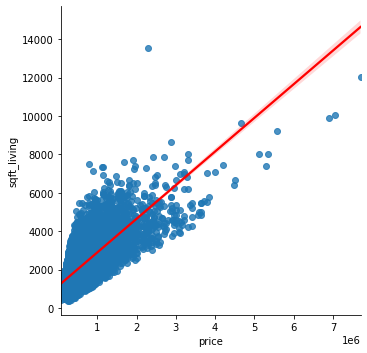

In [16]:
sns.lmplot(x='price', y='sqft_living', data=df, line_kws={'color': 'red'})
plt.show();

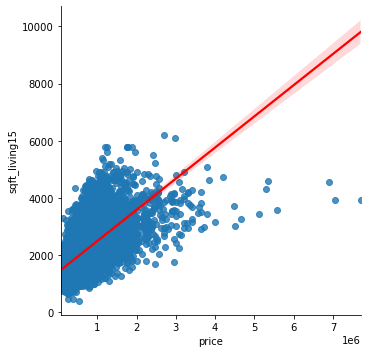

In [17]:
sns.lmplot(x='price', y='sqft_living15', data=df, line_kws={'color': 'red'})
plt.show();

In [18]:
df.price.median()

450000.0

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = df.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2142.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:57:26   Log-Likelihood:            -2.4110e+05
No. Observations:               17704   AIC:                         4.822e+05
Df Residuals:                   17683   BIC:                         4.824e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.126e+06    3.2e+06      2.226      0.026    8.51e+05    1.34e+07
date          -9875.9844   1398.018     -7.064      0.000   -1.26e+04   -7135.732
bedrooms      -1.086e+05   4634.928    -23.436      0.000   -1.18e+05   -9.95e+04
bathrooms      1.709e+05   8079.793     21.152      0.000    1.55e+05    1.87e+05
sqft_living     147.6576      4.774     30.933      0.000     138.301     157.014
sqft_lot          0.0766      0.052      1.487      0.137      -0.024       0.178
floors         5497.7834   3967.286      1.386      0.166   -2278.487    1.33e+04
waterfront     5.983e+05   1.98e+04     30.160      0.000    5.59e+05    6.37e+05
view           5.349e+04   2329.983     22.959      0.000    4.89e+04    5.81e+04
condition      3.004e+04   2569.414     11.693      0.000     2.5e+04    3.51e+04
grade            9.3e+04   2373.268     39.185      0.000    8.83e+04    9.76e+04
sqft_above       25.8815      4.787      5.407      0.000      16.499      35.264
yr_built      -2471.4906     79.693    -31.013      0.000   -2627.697   -2315.284
yr_renovated     26.3008      4.006      6.566      0.000      18.449      34.153
zipcode        -593.8590     35.947    -16.520      0.000    -664.318    -523.400
lat            6.059e+05   1.17e+04     51.744      0.000    5.83e+05    6.29e+05
long          -2.156e+05   1.43e+04    -15.032      0.000   -2.44e+05   -1.87e+05
sqft_living15    26.4406      3.803      6.953      0.000      18.987      33.894
sqft_lot15       -0.3355      0.079     -4.254      0.000      -0.490      -0.181
bed_bath       1.153e+05   5742.232     20.085      0.000    1.04e+05    1.27e+05
bath_bed      -7.545e+04   1.99e+04     -3.784      0.000   -1.15e+05   -3.64e+04
==============================================================================
Omnibus:                    14351.443   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1277117.587
Skew:                           3.329   Prob(JB):                         0.00
Kurtosis:                      44.073   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split data low < 300,000 // mid 300,000 - 650,000 // high >= 650,000
#### because the median is 450,000 and the mean is 540,000 in order to get a cleaner slice of the data this is why i chose these numbers

In [20]:
df_low_price = df.loc[df['price']< 300000]
df_low_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
0,7129300520,3,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.000000,0.333333
2,5631500400,4,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2.000000,0.500000
6,1321400060,2,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,1.333333,0.750000
7,2008000270,4,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,2.000000,0.500000
8,2414600126,1,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,1760650820,1,290000.0,3,2.25,1610,3764,2.0,0.0,0.0,...,0.0,2012,0.0,98042,47.3589,-122.083,1610,3825,1.333333,0.750000
21534,880000205,2,249000.0,3,2.00,1260,1125,2.0,0.0,0.0,...,450.0,2011,0.0,98106,47.5262,-122.361,1260,1172,1.500000,0.666667
21556,6056111067,2,230000.0,3,1.75,1140,1201,2.0,0.0,0.0,...,0.0,2014,NaN,98108,47.5637,-122.295,1210,1552,1.714286,0.583333
21569,3832050760,2,270000.0,3,2.50,1870,5000,2.0,0.0,0.0,...,0.0,2009,0.0,98042,47.3339,-122.055,2170,5399,1.200000,0.833333


In [21]:
predictors_low = df_low_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_low= '+'.join(predictors_low)
f = 'price ~' + predict_low
model = ols(formula=f, data=df_low_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     94.46
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          5.58e-311
Time:                        10:57:26   Log-Likelihood:                -43088.
No. Observations:                3625   AIC:                         8.622e+04
Df Residuals:                    3604   BIC:                         8.635e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.377e+06   1.09e+06     -4.015      0.000   -6.52e+06   -2.24e+06
date          -1258.5395    545.512     -2.307      0.021   -2328.082    -188.997
bedrooms      -3845.0493   2674.586     -1.438      0.151   -9088.902    1398.803
bathrooms      1.484e+04   4638.116      3.199      0.001    5745.172    2.39e+04
sqft_living      25.4711      2.814      9.051      0.000      19.953      30.989
sqft_lot         -0.0010      0.025     -0.041      0.967      -0.051       0.049
floors         3402.0955   1912.911      1.778      0.075    -348.401    7152.593
waterfront     5.913e+04   2.61e+04      2.263      0.024    7891.505     1.1e+05
view           9803.0974   2131.994      4.598      0.000    5623.062     1.4e+04
condition      1.045e+04    953.326     10.958      0.000    8577.779    1.23e+04
grade          9303.6109   1138.209      8.174      0.000    7072.013    1.15e+04
sqft_above        1.1693      2.815      0.415      0.678      -4.349       6.688
yr_built        149.3618     37.843      3.947      0.000      75.167     223.557
yr_renovated      5.6169      1.903      2.951      0.003       1.886       9.348
zipcode          -4.3433     11.826     -0.367      0.713     -27.530      18.844
lat            1.238e+05   5975.997     20.721      0.000    1.12e+05    1.36e+05
long           1.049e+04   5076.622      2.066      0.039     532.735    2.04e+04
sqft_living15    13.1396      2.046      6.421      0.000       9.128      17.151
sqft_lot15        0.0192      0.042      0.459      0.646      -0.063       0.101
bed_bath      -2135.8429   2653.055     -0.805      0.421   -7337.482    3065.796
bath_bed      -1.633e+04   8429.053     -1.937      0.053   -3.29e+04     200.532
==============================================================================
Omnibus:                      192.873   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.999
Skew:                          -0.562   Prob(JB):                     1.88e-50
Kurtosis:                       3.504   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df_low_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.415816
bathrooms        0.395638
grade            0.373770
sqft_above       0.342194
sqft_living15    0.321396
yr_built         0.275575
floors           0.237730
bed_bath         0.234087
bedrooms         0.224481
bath_bed         0.213149
lat              0.081267
view             0.066596
long             0.056530
zipcode          0.052562
id               0.039742
condition        0.033300
waterfront       0.023752
date             0.011631
yr_renovated     0.006864
sqft_lot15       0.004650
sqft_lot         0.004512
Name: price, dtype: float64

In [23]:
X_low, y_low = df[['price']], df[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'condition']]
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, random_state=42, test_size=.25)




In [24]:
X_train_low.isna().sum()

price    0
dtype: int64

In [25]:
X_test_low.isna().sum()

price    0
dtype: int64

In [26]:
lr_low = LinearRegression()

In [27]:
lr_low.fit(X_train_low, y_train_low)

LinearRegression()

In [28]:

print('Intercept: {}'.format(lr_low.intercept_))
print('Slope: {}'.format(lr_low.coef_))

Intercept: [1133.47866533    1.51508098    6.49824448 1055.13137463    3.36601985]
Slope: [[1.75548059e-03]
 [1.11095910e-06]
 [2.14389628e-06]
 [1.35850298e-03]
 [8.19620586e-08]]


In [29]:
train_preds1_low = lr_low.predict(X_train_low)
test_preds1_low = lr_low.predict(X_test_low)

In [30]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_low, train_preds1_low))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test_low, test_preds1_low))))

Training RMSE: 416.34096319272624
Testing RMSE: 411.4891912909102


In [31]:
def bias(y, y_hat):
    return np.mean(y_hat - y)

In [32]:
def variance(y_hat):
       return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

In [33]:
b = bias(y_train_low, train_preds1_low)
v = variance(train_preds1_low)
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: sqft_living    2.011647e-14
bathrooms      7.260284e-17
grade         -6.744826e-17
sqft_above     8.389116e-14
condition      9.610006e-17
dtype: float64 
Train variance: 1037314.3881207148


In [34]:
b = bias(y_test_low, test_preds1_low)
v = variance(test_preds1_low)
print('Test bias: {} \nTest variance: {}'.format(b, v))

Test bias: sqft_living    6.546935
bathrooms     -0.001991
grade         -0.005324
sqft_above     2.115847
condition      0.001913
dtype: float64 
Test variance: 1034484.8222574232


In [35]:
df_middle_price = df.loc[(300000 <= df['price']) & (df['price'] < 650000)]
df_middle_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
1,6414100192,4,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.333333,0.750000
3,2487200875,4,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.333333,0.750000
4,1954400510,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.500000,0.666667
9,3793500160,1,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,1.200000,0.833333
11,9212900260,1,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,2.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,1,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1.200000,0.833333
21593,6600060120,4,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1.600000,0.625000
21594,1523300141,2,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2.666667,0.375000
21595,291310100,4,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1.200000,0.833333


In [36]:
predictors_middle = df_middle_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_middle= '+'.join(predictors_middle)
f = 'price ~' + predict_middle
model = ols(formula=f, data=df_middle_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     287.3
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:57:27   Log-Likelihood:            -1.2307e+05
No. Observations:                9717   AIC:                         2.462e+05
Df Residuals:                    9696   BIC:                         2.463e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -4.3e+06   1.81e+06     -2.370      0.018   -7.86e+06   -7.43e+05
date          -4036.3293    726.301     -5.557      0.000   -5460.031   -2612.628
bedrooms       -559.0864   2637.196     -0.212      0.832   -5728.540    4610.368
bathrooms      5733.8278   4710.723      1.217      0.224   -3500.173     1.5e+04
sqft_living      33.9733      2.765     12.288      0.000      28.554      39.393
sqft_lot          0.1194      0.034      3.535      0.000       0.053       0.186
floors         2.194e+04   2090.297     10.497      0.000    1.78e+04     2.6e+04
waterfront      6.67e+04   1.89e+04      3.520      0.000    2.96e+04    1.04e+05
view           1.189e+04   1560.499      7.622      0.000    8834.904     1.5e+04
condition      8754.3620   1384.992      6.321      0.000    6039.488    1.15e+04
grade          4.074e+04   1375.261     29.623      0.000     3.8e+04    4.34e+04
sqft_above       -8.6264      2.739     -3.149      0.002     -13.996      -3.257
yr_built      -1188.7336     43.968    -27.036      0.000   -1274.920   -1102.547
yr_renovated     -0.1575      2.383     -0.066      0.947      -4.828       4.513
zipcode         -44.3589     20.864     -2.126      0.034     -85.256      -3.462
lat            3.145e+05   6496.523     48.410      0.000    3.02e+05    3.27e+05
long           3.285e+04   7552.180      4.349      0.000     1.8e+04    4.76e+04
sqft_living15    27.9351      2.338     11.946      0.000      23.351      32.519
sqft_lot15        0.0832      0.045      1.847      0.065      -0.005       0.172
bed_bath        -56.3054   3416.040     -0.016      0.987   -6752.456    6639.846
bath_bed        3.23e+04   9776.036      3.304      0.001    1.31e+04    5.15e+04
==============================================================================
Omnibus:                      131.977   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.298
Skew:                           0.244   Prob(JB):                     6.19e-28
Kurtosis:                       2.734   Cond. No.                     2.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
df_middle_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
grade            0.322745
sqft_living      0.284849
lat              0.271453
sqft_living15    0.260651
sqft_above       0.201190
bathrooms        0.187177
bedrooms         0.112780
bed_bath         0.098861
bath_bed         0.096704
view             0.095708
floors           0.080637
sqft_lot         0.059713
sqft_lot15       0.055117
condition        0.042578
id               0.041142
yr_built         0.040886
yr_renovated     0.037600
long             0.035189
date             0.023570
zipcode          0.023138
waterfront       0.014796
Name: price, dtype: float64

In [38]:
X_middle, y_middle = df[['price']], df[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'lat']]
X_train_middle, X_test_middle, y_train_middle, y_test_middle = train_test_split(X_middle, y_middle, random_state=42, test_size=.25)




In [39]:
lr_middle = LinearRegression()

In [40]:
lr_middle.fit(X_train_middle, y_train_middle)

LinearRegression()

In [41]:
print('Intercept: {}'.format(lr_middle.intercept_))
print('Slope: {}'.format(lr_middle.coef_))



Intercept: [1133.47866533    1.51508098    6.49824448 1055.13137463   47.49832421]
Slope: [[1.75548059e-03]
 [1.11095910e-06]
 [2.14389628e-06]
 [1.35850298e-03]
 [1.15744740e-07]]


In [42]:
train_preds1_middle = lr_middle.predict(X_train_middle)
test_preds1_middle = lr_middle.predict(X_test_middle)



In [43]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_middle, train_preds1_middle))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test_middle, test_preds1_middle))))



Training RMSE: 416.3408658536477
Testing RMSE: 411.4890927738007


In [44]:
b = bias(y_train_middle, train_preds1_middle)
v = variance(train_preds1_middle)
print('Train bias: {} \nTrain variance: {}'.format(b, v))



Train bias: sqft_living    2.011647e-14
bathrooms      7.260284e-17
grade         -6.744826e-17
sqft_above     8.389116e-14
lat            2.874722e-15
dtype: float64 
Train variance: 1023956.2091056658


In [45]:
b = bias(y_test_middle, test_preds1_middle)
v = variance(test_preds1_middle)
print('Test bias: {} \nTest variance: {}'.format(b, v))



Test bias: sqft_living    6.546935
bathrooms     -0.001991
grade         -0.005324
sqft_above     2.115847
lat            0.003070
dtype: float64 
Test variance: 1021170.1794506146


In [46]:
df_higher_price = df.loc[df['price']>= 650000]
df_higher_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
5,7237550310,1,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.888889,1.125000
10,1736800520,1,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,1.200000,0.833333
15,9297300055,4,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,1.333333,0.750000
21,2524049179,2,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,1.090909,0.916667
26,1794500383,2,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573,1.714286,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,2,679950.0,5,2.75,3600,9437,2.0,0.0,0.0,...,0.0,2014,0.0,98059,47.4822,-122.131,3550,9421,1.818182,0.550000
21581,191100405,1,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,...,?,2007,NaN,98040,47.5653,-122.223,2290,10125,1.230769,0.812500
21583,7202300110,3,810000.0,4,3.00,3990,7838,2.0,0.0,0.0,...,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814,1.333333,0.750000
21584,249000205,3,1540000.0,5,3.75,4470,8088,2.0,0.0,0.0,...,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964,1.333333,0.750000


In [47]:
predictors_higher = df_higher_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_higher= '+'.join(predictors_higher)
f = 'price ~' + predict_higher
model = ols(formula=f, data=df_higher_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     363.1
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:57:27   Log-Likelihood:                -61107.
No. Observations:                4362   AIC:                         1.223e+05
Df Residuals:                    4341   BIC:                         1.224e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.934e+07   1.05e+07      3.752      0.000    1.88e+07    5.99e+07
date          -1.552e+04   4250.502     -3.651      0.000   -2.39e+04   -7186.440
bedrooms      -1.581e+05   1.55e+04    -10.220      0.000   -1.88e+05   -1.28e+05
bathrooms      2.467e+05   2.33e+04     10.604      0.000    2.01e+05    2.92e+05
sqft_living     168.7225     10.796     15.628      0.000     147.557     189.888
sqft_lot          0.1980      0.110      1.794      0.073      -0.018       0.414
floors        -4.567e+04   1.19e+04     -3.829      0.000   -6.91e+04   -2.23e+04
waterfront     6.623e+05   3.31e+04     20.028      0.000    5.97e+05    7.27e+05
view           3.949e+04   4571.457      8.638      0.000    3.05e+04    4.85e+04
condition      3.383e+04   8050.043      4.203      0.000     1.8e+04    4.96e+04
grade          9.453e+04   6192.900     15.264      0.000    8.24e+04    1.07e+05
sqft_above       74.3723     11.296      6.584      0.000      52.227      96.518
yr_built      -2453.6584    224.659    -10.922      0.000   -2894.105   -2013.212
yr_renovated     31.0923      9.330      3.332      0.001      12.800      49.384
zipcode       -2259.3984    115.788    -19.513      0.000   -2486.401   -2032.396
lat            6.619e+05   6.32e+04     10.470      0.000    5.38e+05    7.86e+05
long          -1.266e+06   5.35e+04    -23.654      0.000   -1.37e+06   -1.16e+06
sqft_living15    30.8471      8.728      3.534      0.000      13.736      47.958
sqft_lot15       -0.6100      0.188     -3.242      0.001      -0.979      -0.241
bed_bath       1.929e+05   2.14e+04      9.012      0.000    1.51e+05    2.35e+05
bath_bed      -2.405e+05   7.34e+04     -3.277      0.001   -3.84e+05   -9.66e+04
==============================================================================
Omnibus:                     2158.204   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42470.715
Skew:                           1.897   Prob(JB):                         0.00
Kurtosis:                      17.808   Cond. No.                     2.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
df_higher_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.606855
grade            0.507928
sqft_above       0.466493
bathrooms        0.465078
sqft_living15    0.373587
view             0.337407
waterfront       0.306229
bath_bed         0.271814
bed_bath         0.218470
bedrooms         0.202216
floors           0.126413
yr_renovated     0.106662
zipcode          0.083262
long             0.082348
id               0.051263
sqft_lot15       0.038203
sqft_lot         0.032130
yr_built         0.031285
lat              0.010257
condition        0.004123
date             0.001539
Name: price, dtype: float64

In [49]:
X_higher, y_higher = df[['price']], df[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'waterfront']]
X_train_higher, X_test_higher, y_train_higher, y_test_higher = train_test_split(X_higher, y_higher, random_state=42, test_size=.25)




In [50]:
lr_higher = LinearRegression()

In [51]:
lr_higher.fit(X_train_higher, y_train_higher)

LinearRegression()

In [52]:
print('Intercept: {}'.format(lr_higher.intercept_))
print('Slope: {}'.format(lr_higher.coef_))

Intercept: [ 1.13347867e+03  1.51508098e+00  6.49824448e+00  1.05513137e+03
 -2.57749404e-02]
Slope: [[1.75548059e-03]
 [1.11095910e-06]
 [2.14389628e-06]
 [1.35850298e-03]
 [6.02789543e-08]]


In [53]:
train_preds1_higher = lr_higher.predict(X_train_higher)
test_preds1_higher = lr_higher.predict(X_test_higher)

In [54]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_higher, train_preds1_higher))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test_higher, test_preds1_higher))))

Training RMSE: 416.3408632111703
Testing RMSE: 411.48908996083435


In [55]:
b = bias(y_train_higher, train_preds1_higher)
v = variance(train_preds1_higher)
print('Train bias: {} \nTrain variance: {}'.format(b, v))


Train bias: sqft_living    2.011647e-14
bathrooms      7.260284e-17
grade         -6.744826e-17
sqft_above     8.389116e-14
waterfront     1.649899e-18
dtype: float64 
Train variance: 1038370.0550397836


In [56]:
b = bias(y_test_higher, test_preds1_higher)
v = variance(test_preds1_higher)
print('Test bias: {} \nTest variance: {}'.format(b, v))


Test bias: sqft_living    6.546935
bathrooms     -0.001991
grade         -0.005324
sqft_above     2.115847
waterfront     0.000133
dtype: float64 
Test variance: 1035537.1095016381
